In [1]:
import os
os.chdir(os.path.join('..', '..'))
print(os.getcwd())

/Users/eharkin/Documents/projects/5HTGIF


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ezephys.rectools import ABFLoader
from grr.Trace import detectSpikes
from grr.Tools import timeToIntVec
from grr.Spiketrain import PSTH


# Long current steps

In [3]:
ser_fnames = pd.read_csv(os.path.join('data', 'raw', '5HT', 'long_curr_steps', 'index.csv'))
gaba_fnames = pd.read_csv(os.path.join('data', 'raw', 'GABA', 'long_curr_steps', 'index.csv'))

In [4]:
ser_fnames

,Cell,R,C,I_hold,strong_steps,weak_steps
0,DRN435,2800,78,1.8,NaN,19204001.abf
1,DRN436,1400,84,14.0,19204007.abf,19204008.abf
2,DRN438,1400,69,4.9,19204069.abf,19204068.abf
3,DRN439,1400,72,-4.3,19204098.abf,19204097.abf
4,DRN440,829,63,-18.0,19204120.abf,19204121.abf


In [5]:
gaba_fnames

,Cell,R,C,I_hold,strong_steps,weak_steps
0,DRN421,836,71,-11.0,19114006.abf,NaN
1,DRN422,1400,57,13.4,19114023.abf,19114024.abf
2,DRN424,1400,32,-9.8,19114046.abf,19114047.abf
3,DRN425,1000,31,-8.5,19118005.abf,NaN
4,DRN426,2100,32,9.8,19118033.abf,19118034.abf
5,DRN431,2100,27,0.6,19121014.abf,19121013.abf
6,DRN432,1000,36,-25.0,19121028.abf,19121028.abf
7,DRN433,437,64,-65.0,19121042.abf,19121043.abf
8,DRN434,400,49,-27.0,19121044.abf,19121045.abf


In [6]:
loader = ABFLoader()
current_steps = {
    'ser': loader.load(
        [os.path.join('data', 'raw', '5HT', 'long_curr_steps', fname) 
         for fname in ser_fnames['weak_steps']
         if isinstance(fname, str)]
    ),
    'gaba': loader.load(
        [os.path.join('data', 'raw', 'GABA', 'long_curr_steps', fname) 
         for fname in gaba_fnames['weak_steps'] 
         if isinstance(fname, str)]
    )
}

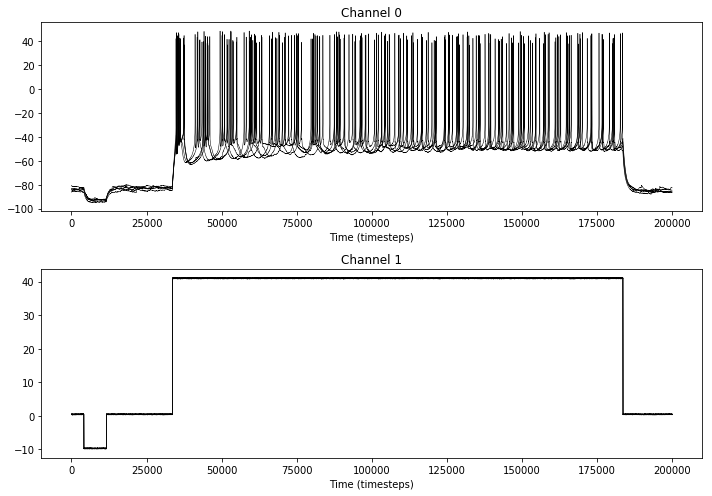

In [7]:
current_steps['ser'][0].plot()

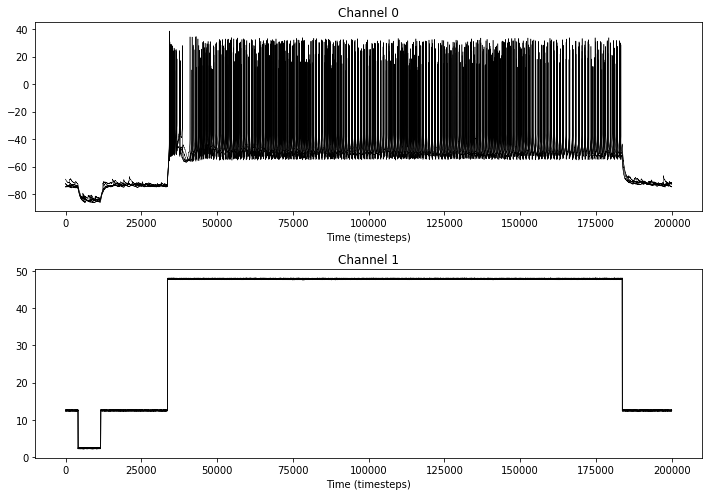

In [8]:
current_steps['gaba'][0].plot()

In [9]:
[rec[1, :100, :].mean() for rec in current_steps['ser']]

[Recording(0.43701172),
 Recording(14.46325684),
 Recording(0.44140625),
 Recording(-7.57434082),
 Recording(-14.59143066)]

In [10]:
[rec[0, :100, :].mean() for rec in current_steps['ser']]

[Recording(-83.62640381),
 Recording(-77.34106445),
 Recording(-73.05126953),
 Recording(-69.73980713),
 Recording(-69.38842773)]

In [11]:
[rec[1, :100, :].mean() for rec in current_steps['gaba']]

[Recording(12.51672363),
 Recording(-5.54211426),
 Recording(0.43994141),
 Recording(-9.62365723),
 Recording(-24.63358561),
 Recording(-44.70629883),
 Recording(-1.54296875)]

In [12]:
[rec[0, :100, :].mean() for rec in current_steps['gaba']]

[Recording(-72.63110352),
 Recording(-73.83929443),
 Recording(-73.23181152),
 Recording(-79.84558105),
 Recording(-53.23165894),
 Recording(-67.7756958),
 Recording(-60.60028076)]

In [13]:
def psth_from_recording(rec, window_width):
    spk_times = detectSpikes(rec, -20., 3., 0)
    spk_train = np.sum([timeToIntVec(x, rec.shape[0] * rec.dt, rec.dt) for x in spk_times], axis=0)
    psth = PSTH(spk_train, window_width, rec.shape[1], rec.dt)
    return psth

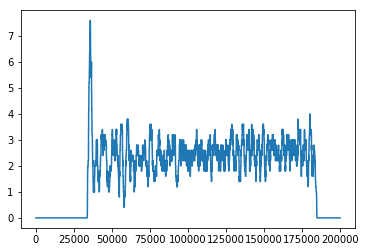

In [14]:
psths = []
for rec in current_steps['ser']:
    psths.append(psth_from_recording(rec[0, ...], 200.))
    
plt.plot(np.mean(psths, axis=0))

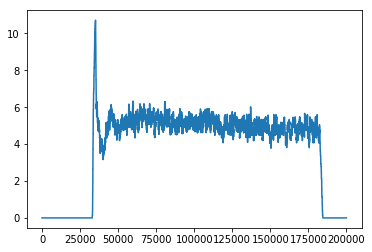

In [15]:
psths = []
for rec in current_steps['gaba']:
    psths.append(psth_from_recording(rec[0, ...], 200.))
    
plt.plot(np.mean(psths, axis=0))

In [16]:
loader = ABFLoader()
current_steps = {
    'ser': loader.load(
        [os.path.join('data', 'raw', '5HT', 'long_curr_steps', fname) 
         for fname in ser_fnames['strong_steps']
         if isinstance(fname, str)]
    ),
    'gaba': loader.load(
        [os.path.join('data', 'raw', 'GABA', 'long_curr_steps', fname) 
         for fname in gaba_fnames['strong_steps'] 
         if isinstance(fname, str)]
    )
}

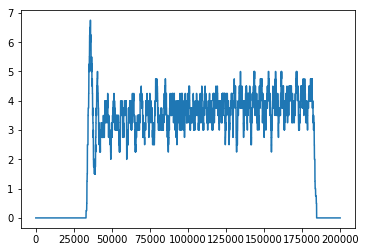

In [17]:
psths = []
for rec in current_steps['ser']:
    psths.append(psth_from_recording(rec[0, ...], 200.))
    
plt.plot(np.mean(psths, axis=0))

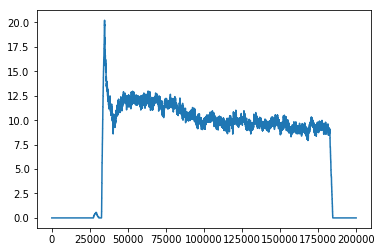

In [18]:
psths = []
for rec in current_steps['gaba']:
    psths.append(psth_from_recording(rec[0, ...], 200.))
    
plt.plot(np.mean(psths, axis=0))

# Short current steps

In [19]:
ser_fnames = pd.read_csv(os.path.join('data', 'raw', '5HT', 'current_steps', 'index.csv'))
gaba_fnames = pd.read_csv(os.path.join('data', 'raw', 'GABA', 'current_steps', 'index.csv'))

In [20]:
ser_fnames

,Cell,R,C,hold,Steps
0,DRN159,707,43,-11.0,17n23013.abf
1,DRN160,365,79,-9.8,17n23017.abf
2,DRN162,485,57,-17.1,17n23022.abf
3,DRN163,1400,61,2.4,17n23027.abf
4,DRN164,919,39,-27.0,17n23034.abf
5,DRN165,759,63,-14.6,17n23038.abf
6,DRN196,923,74,-6.0,18111055.abf
7,DRN316,1200,40,-8.5,18420001.abf
8,DRN317,743,93,3.7,18420006.abf
9,DRN318,702,51,-8.0,18420025.abf


In [21]:
loader = ABFLoader()
short_current_steps = {
    'ser': loader.load(
        [os.path.join('data', 'raw', '5HT', 'current_steps', fname) 
         for fname in ser_fnames['Steps']]
    ),
    'gaba': loader.load(
        [os.path.join('data', 'raw', 'GABA', 'current_steps', fname) 
         for fname in gaba_fnames['Steps'] 
         if isinstance(fname, str)]
    )
}

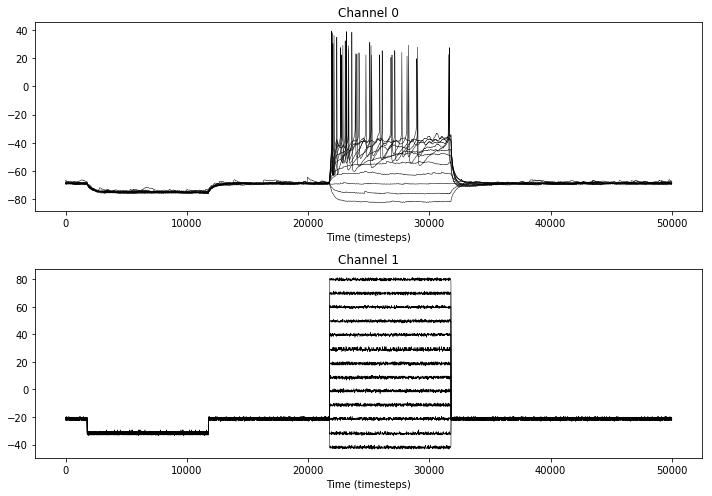

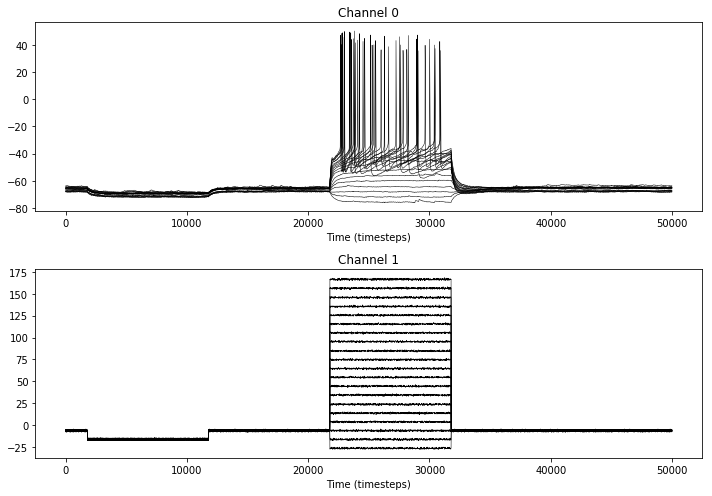

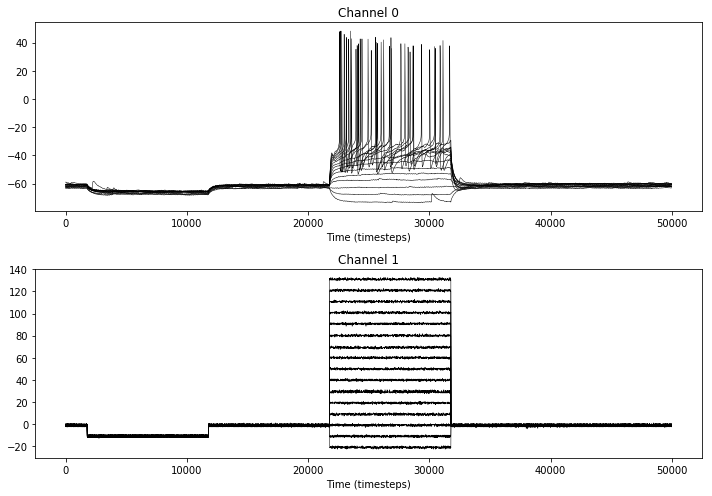

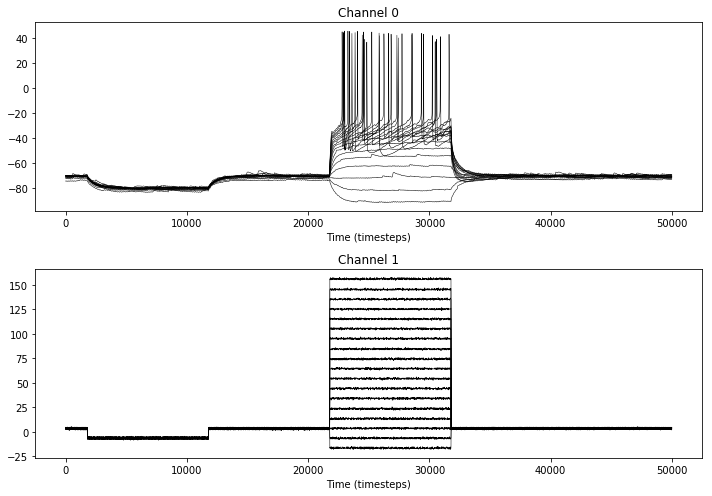

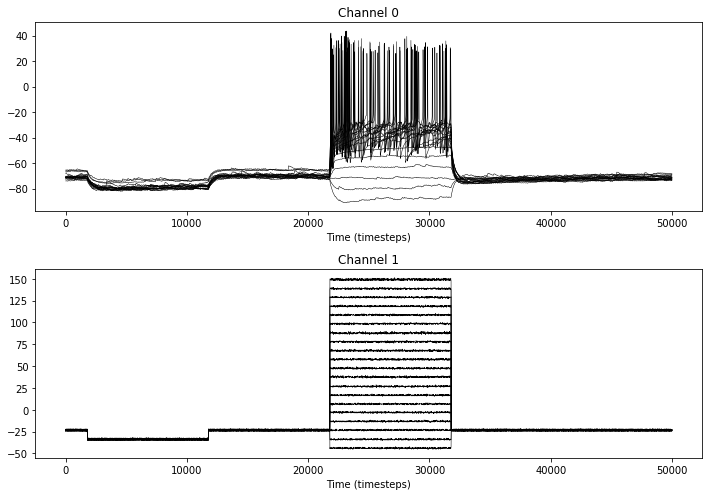

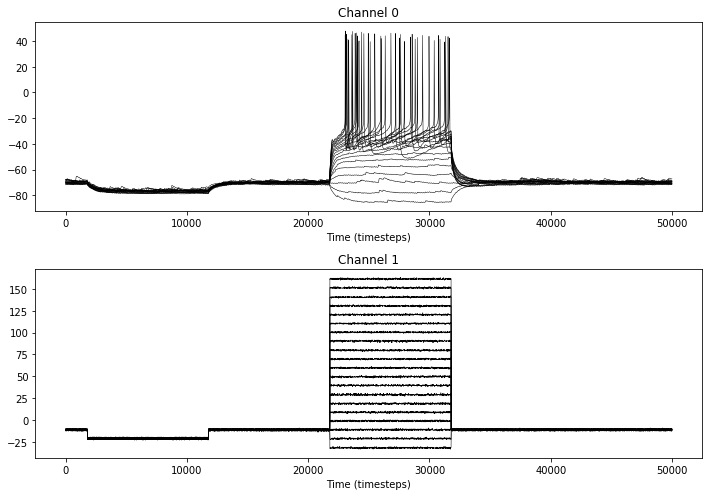

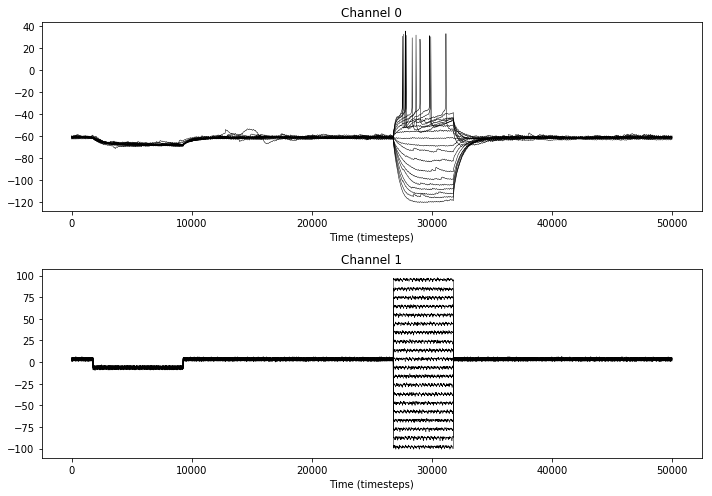

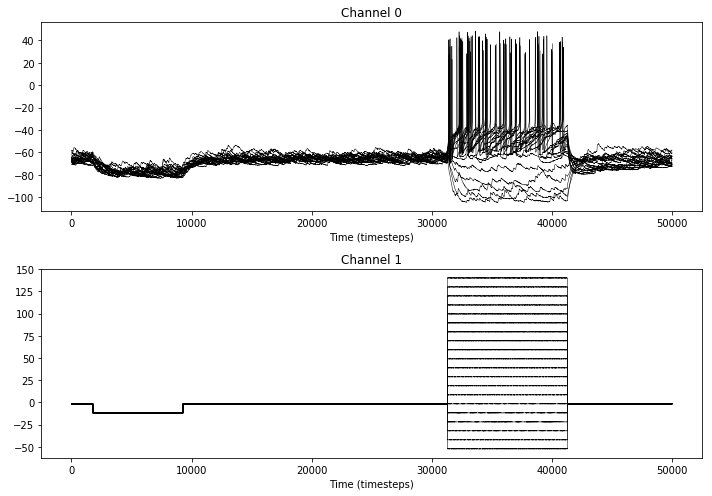

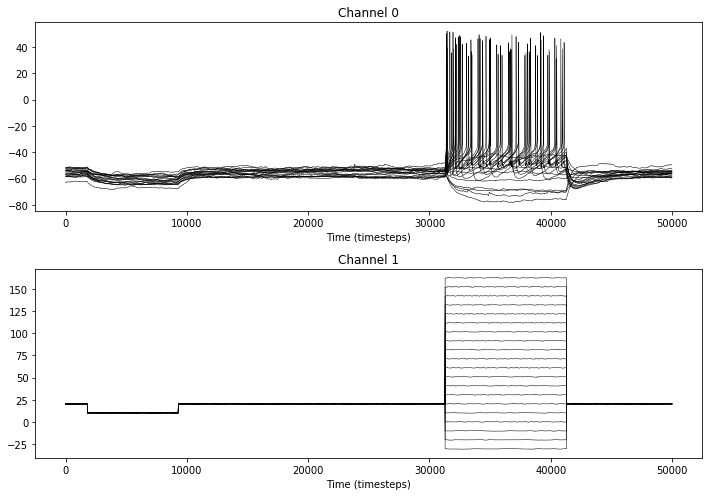

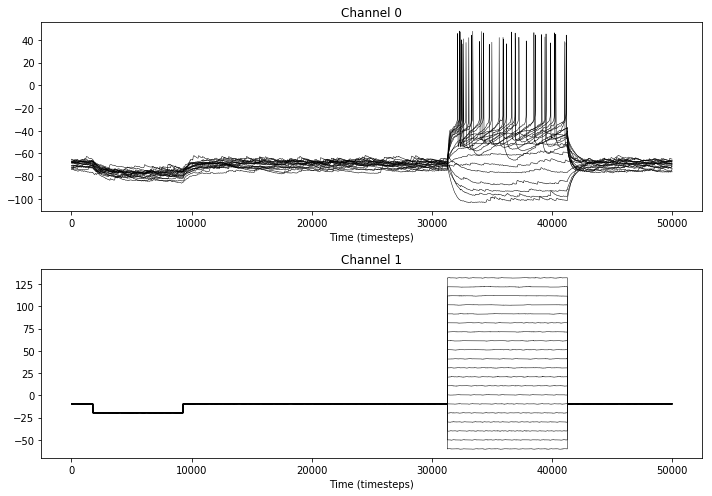

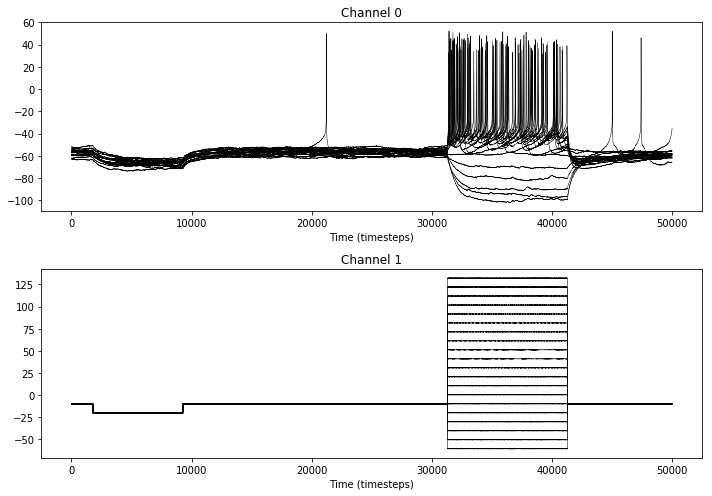

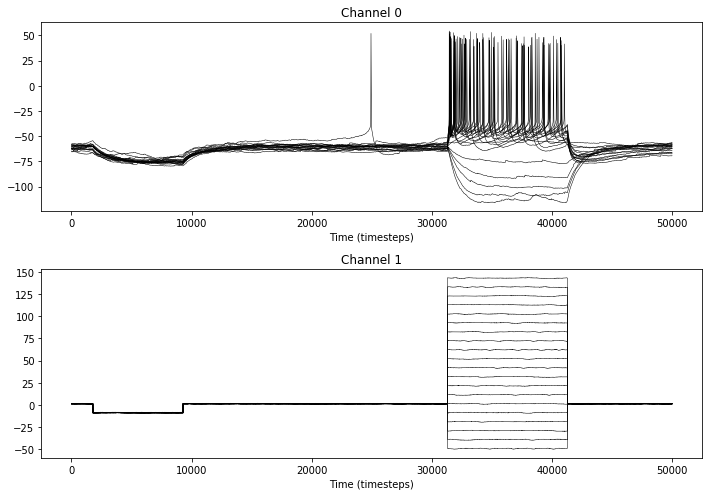

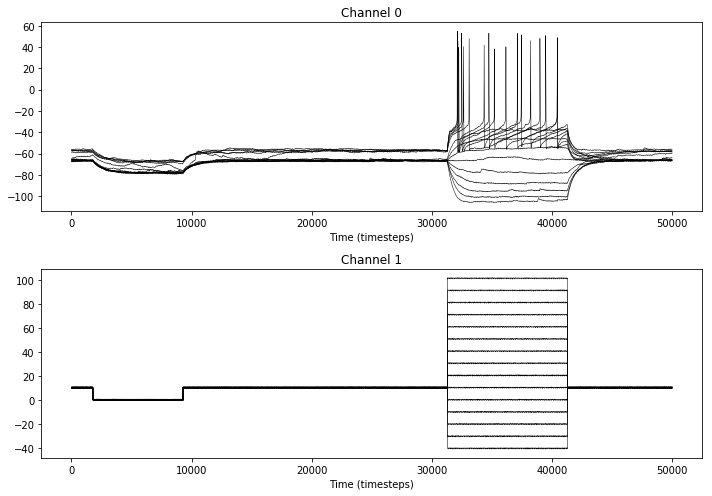

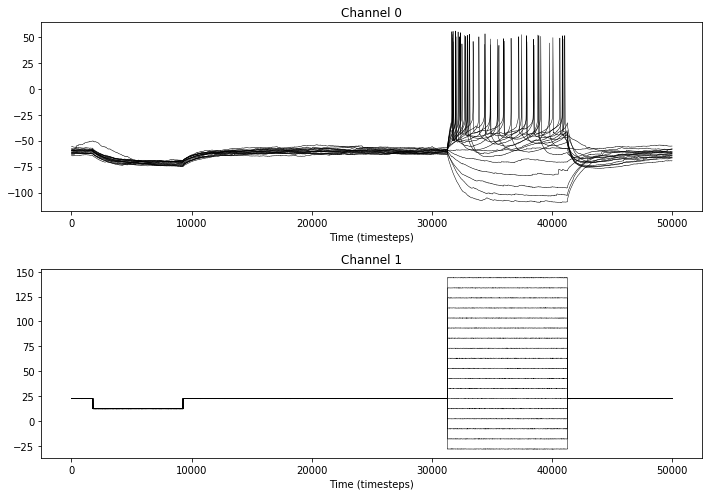

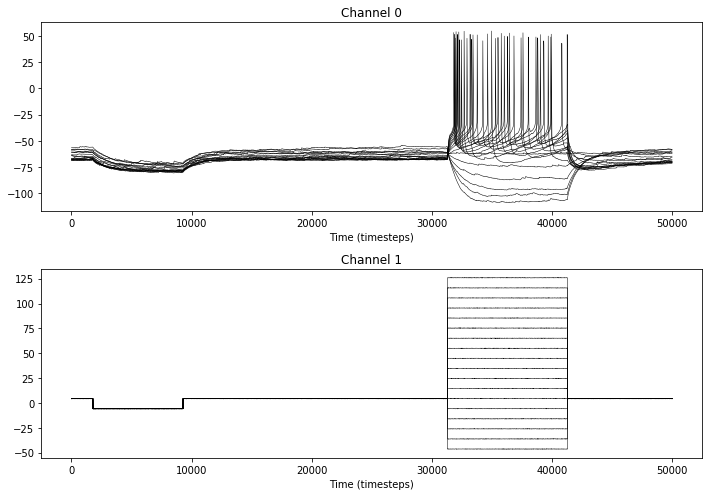

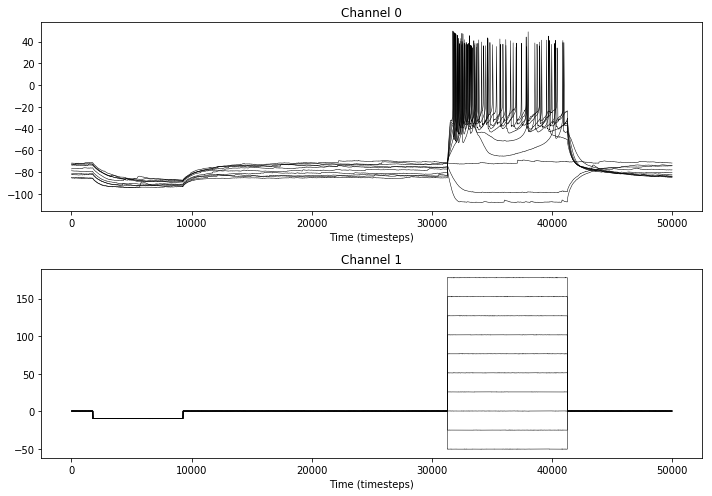

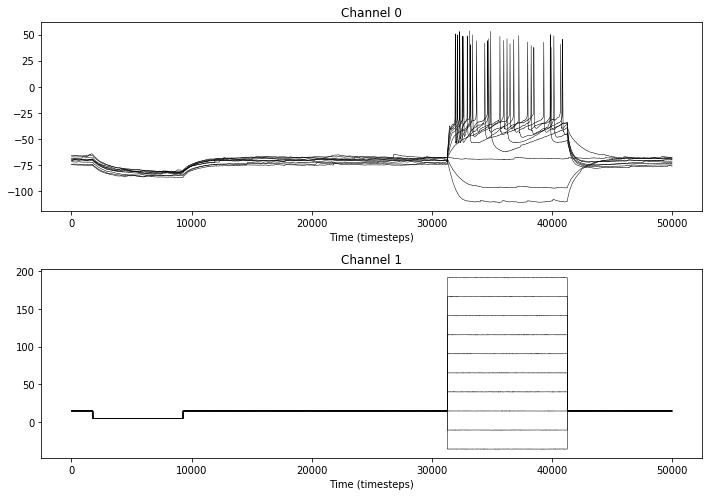

In [22]:
for rec in short_current_steps['ser']:
    rec.plot()

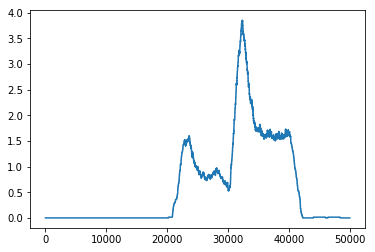

In [23]:
psths = []
for rec in short_current_steps['ser']:
    psths.append(psth_from_recording(rec[0, ...], 200.))
    
plt.plot(np.mean(psths, axis=0))

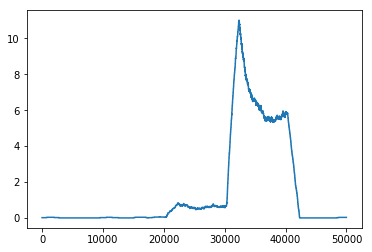

In [24]:
psths = []
for rec in short_current_steps['gaba']:
    psths.append(psth_from_recording(rec[0, ...], 200.))
    
plt.plot(np.mean(psths, axis=0))

PSTHs are not interpretable because multiple step amplitudes.